{'coord': {'lon': -123.1193, 'lat': 49.2497}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.49, 'feels_like': 13.9, 'temp_min': 13.75, 'temp_max': 15.14, 'pressure': 1021, 'humidity': 73, 'sea_level': 1021, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1727489535, 'sys': {'type': 2, 'id': 2011597, 'country': 'CA', 'sunrise': 1727446025, 'sunset': 1727488760}, 'timezone': -25200, 'id': 6173331, 'name': 'Vancouver', 'cod': 200}
        city  temperature  humidity  wind_speed weather_description  \
0  Vancouver        14.49        73        2.24     overcast clouds   

                   timestamp  
0 2024-09-28 02:14:53.146916  
Data successfully added


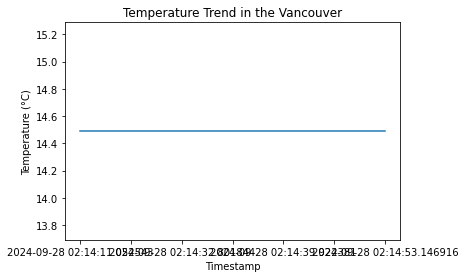

In [13]:
import requests
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
#using OpenWeather API endpoint

api_key = '3945824cad5f4216de902f1e00105996'
#city can be changed accordingly
city = 'Vancouver'
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_key}&units=metric'

#make a request and store it as json

response = requests.get(url)

#check if the request was successful

if response.status_code == 200:
    data = response.json()#converting api respont to json format
    print(data)#printing for reference
else:
    print('Error')

#extracting relevant information from JSON

weather_data = {'city': data['name'],
               'temperature': data['main']['temp'],
               'humidity': data['main']['humidity'],
               'wind_speed': data['wind']['speed'],
               'weather_description': data['weather'][0]['description'],
               'timestamp': pd.to_datetime('now')}

#converting to data frame

df = pd.DataFrame([weather_data])

print(df)


# making an sqlite3 database/ creating one if dosent exist 

conn = sqlite3.connect('weather_data.db')

#storing data
df.to_sql('weather_data',conn,if_exists='append',index=False)

print("Data successfully added")


#visualising data
#reading data from weather database
df = pd.read_sql('SELECT * FROM weather_data', conn)

#ploting graph
df.set_index('timestamp')['temperature'].plot()
plt.title(f'Temperature Trend in the {city}')
plt.ylabel('Temperature (°C)')
plt.xlabel('Timestamp')
plt.show()  
